Naive Bayes

The Naive Bayes classifier is a probabilistic machine learning model used for classification tasks. It is based on Bayes' theorem, with the "naive" assumption that features (or predictors) are independent given the class. Despite this often unrealistic assumption of feature independence, Naive Bayes classifiers perform surprisingly well in many real-world applications, particularly in text classification and natural language processing.

1. Data Exploration and Preprocessing

In [39]:
import warnings 
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

import string
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import TfidfVectorizer

# Download NLTK data files (run this once)
import nltk
nltk.download('punkt')
nltk.download('stopwords')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRJAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRJAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
data=pd.read_csv(r"C:\Users\PRJAWAL\OneDrive\Desktop\Excelr\Assignment-19\Naive Bayes and Text Mining\blogs_categories.csv")
data

,Unnamed: 0,Data,Labels
0,0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...,...
19992,19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19997 entries, 0 to 19996
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  19997 non-null  int64 
 1   Data        19997 non-null  object
 2   Labels      19997 non-null  object
dtypes: int64(1), object(2)
memory usage: 468.8+ KB


In [3]:
data.describe()

,Unnamed: 0
count,19997.000000
mean,9998.000000
std,5772.781002
min,0.000000
25%,4999.000000
50%,9998.000000
75%,14997.000000
max,19996.000000


In [18]:
data.isnull().sum()

Data      0
Labels    0
dtype: int64

In [19]:
data[data.duplicated()]

,Data,Labels
4095,Xref: cantaloupe.srv.cs.cmu.edu comp.sys.mac.h...,comp.sys.mac.hardware
14618,Xref: cantaloupe.srv.cs.cmu.edu sci.physics:51...,sci.space
14640,Xref: cantaloupe.srv.cs.cmu.edu sci.physics:52...,sci.space
14646,Xref: cantaloupe.srv.cs.cmu.edu sci.physics:52...,sci.space
18283,Xref: cantaloupe.srv.cs.cmu.edu alt.journalism...,talk.politics.misc


In [20]:
data.drop_duplicates()

,Data,Labels
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism
...,...,...
19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc
19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [14]:
data.drop(['Unnamed: 0'],axis=1,inplace=True)

In [21]:
# Function to clean text
def preprocess_text(text):
    text = text.lower()  # Convert to lowercase
    text = text.translate(str.maketrans('', '', string.punctuation))  # Remove punctuation
    tokens = word_tokenize(text)  # Tokenize the text
    stop_words = set(stopwords.words('english'))  # Load stopwords
    filtered_tokens = [word for word in tokens if word not in stop_words]  # Remove stopwords
    return ' '.join(filtered_tokens)

# Apply preprocessing
data['cleaned_text'] = data['Data'].apply(preprocess_text)
data['cleaned_text']

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\PRJAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\PRJAWAL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


0        xref cantaloupesrvcscmuedu altatheism49960 alt...
1        xref cantaloupesrvcscmuedu altatheism51060 alt...
2        newsgroups altatheism path cantaloupesrvcscmue...
3        xref cantaloupesrvcscmuedu altatheism51120 alt...
4        xref cantaloupesrvcscmuedu altatheism51121 soc...
                               ...                        
19992    xref cantaloupesrvcscmuedu altatheism54482 tal...
19993    xref cantaloupesrvcscmuedu altatheism54485 tal...
19994    xref cantaloupesrvcscmuedu talkreligionmisc845...
19995    xref cantaloupesrvcscmuedu talkreligionmisc845...
19996    xref cantaloupesrvcscmuedu talkabortion121820 ...
Name: cleaned_text, Length: 19997, dtype: object

In [23]:
from textblob import TextBlob

# Function to get sentiment
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'positive'
    elif analysis.sentiment.polarity == 0:
        return 'neutral'
    else:
        return 'negative'

# Apply sentiment analysis
data['sentiment'] = data['cleaned_text'].apply(get_sentiment)

positive    14255
negative     5724
neutral        18
Name: sentiment, dtype: int64


In [24]:
# Display sentiment distribution
print(data['sentiment'].value_counts())

positive    14255
negative     5724
neutral        18
Name: sentiment, dtype: int64


In [40]:
data

,Data,Labels,cleaned_text,sentiment
0,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:49...,alt.atheism,xref cantaloupesrvcscmuedu altatheism49960 alt...,positive
1,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupesrvcscmuedu altatheism51060 alt...,positive
2,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,newsgroups altatheism path cantaloupesrvcscmue...,positive
3,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupesrvcscmuedu altatheism51120 alt...,negative
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:51...,alt.atheism,xref cantaloupesrvcscmuedu altatheism51121 soc...,negative
...,...,...,...,...
19992,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,xref cantaloupesrvcscmuedu altatheism54482 tal...,positive
19993,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:54...,talk.religion.misc,xref cantaloupesrvcscmuedu altatheism54485 tal...,positive
19994,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc845...,positive
19995,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,xref cantaloupesrvcscmuedu talkreligionmisc845...,positive


<Axes: xlabel='sentiment', ylabel='count'>

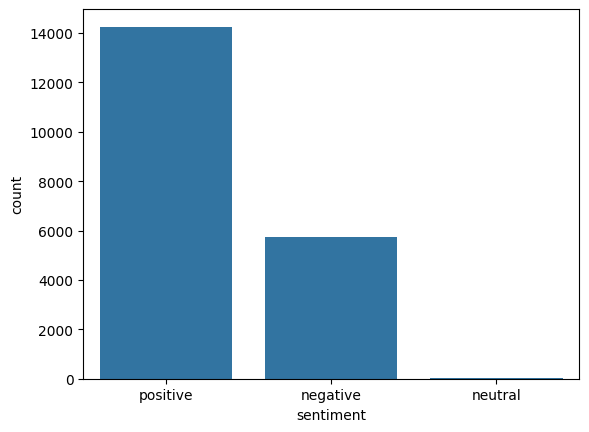

In [30]:
sns.countplot(x='sentiment',data=data)

In [31]:
# Separate features (X) and target (y)
x = data['Data'].astype(str)  # Features: review_text column
y = data['Labels']                # Target: sentiment column

2. Naive Bayes Model for Text Classification

In [34]:
# Split the dataset into training and testing sets (80% train, 20% test)
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [35]:
# Initialize TF-IDF Vectorizer
vectorizer = TfidfVectorizer()

# Fit and transform the training data
x_train = vectorizer.fit_transform(x_train)

# Transform the test data
x_test= vectorizer.transform(x_test)

In [37]:
# Initialize Naive Bayes classifier
nb_classifier = MultinomialNB()

# Train the classifier
nb_classifier.fit(x_train,y_train)


MultinomialNB()

4. Evaluation

In [38]:
# Predict sentiment on the test set
y_pred = nb_classifier.predict(x_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(accuracy)

# Print classification report
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

# Print confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


0.89175

Classification Report:
                          precision    recall  f1-score   support

             alt.atheism       0.78      0.82      0.80       173
           comp.graphics       0.85      0.87      0.86       179
 comp.os.ms-windows.misc       0.95      0.90      0.92       226
comp.sys.ibm.pc.hardware       0.86      0.87      0.86       204
   comp.sys.mac.hardware       0.90      0.96      0.93       205
          comp.windows.x       0.94      0.90      0.92       186
            misc.forsale       0.91      0.81      0.86       190
               rec.autos       0.86      0.93      0.89       203
         rec.motorcycles       0.99      0.94      0.96       218
      rec.sport.baseball       0.97      0.94      0.96       192
        rec.sport.hockey       0.95      0.97      0.96       203
               sci.crypt       0.92      0.98      0.95       200
         sci.electronics       0.94      0.81      0.87       227
                 sci.med       0.99      0.

In conclusion, the Naive Bayes classifier, with proper preprocessing and feature extraction, can effectively categorize blog posts. Performance evaluation using metrics such as accuracy, precision, recall, and F1-score provides a comprehensive view of the model’s effectiveness. Challenges such as class imbalance and text preprocessing need careful handling to ensure robust performance.

Sentiment analysis adds another layer of understanding, revealing the emotional tone of the blog posts. These insights can be crucial for content strategy, reader engagement, and marketing efforts.

By combining text classification with sentiment analysis, you gain a powerful toolkit for extracting and leveraging insights from textual data, enhancing both the analytical and strategic capabilities of your organization.